In [40]:
#Install Required Libraries
!pip install textblob
!pip install wordcloud
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from textblob import TextBlob
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [42]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")
    

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [43]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,✅ Trip Verified | My partner and I were on the...
1,Not Verified | We had a Premium Economy retur...
2,✅ Trip Verified | I should like to review my ...
3,✅ Trip Verified | We have flown with British A...
4,✅ Trip Verified | I sat in the plane at Vienna...


In [44]:
df.to_csv("F:/Jobs/Certificates/British_Airways/Dataset_BA_Reviews.csv")

In [45]:
# Load the dataset
file_path = "F:/Jobs/Certificates/British_Airways/Dataset_BA_Reviews.csv"
reviews_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(reviews_df.head())


   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified | My partner and I were on the...
1           1  Not Verified |  We had a Premium Economy retur...
2           2  ✅ Trip Verified |  I should like to review my ...
3           3  ✅ Trip Verified | We have flown with British A...
4           4  ✅ Trip Verified | I sat in the plane at Vienna...


In [46]:

# Function to clean the reviews
def clean_review(review):
    # Remove "✅ Trip Verified" and "Trip Verified"
    review = re.sub(r'✅ Trip Verified', '', review)
    review = re.sub(r'Trip Verified', '', review)
    return review.strip()

# Apply the cleaning function to the reviews
reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(clean_review)

# Display the first few rows of the cleaned dataset
print(reviews_df[['cleaned_reviews']].head())


                                     cleaned_reviews
0  | My partner and I were on the BA2166 return f...
1  Not Verified |  We had a Premium Economy retur...
2  |  I should like to review my flight with Brit...
3  | We have flown with British Airways a few tim...
4  | I sat in the plane at Vienna airport for thr...


Positive    625
Negative    365
Neutral      10
Name: sentiment, dtype: int64


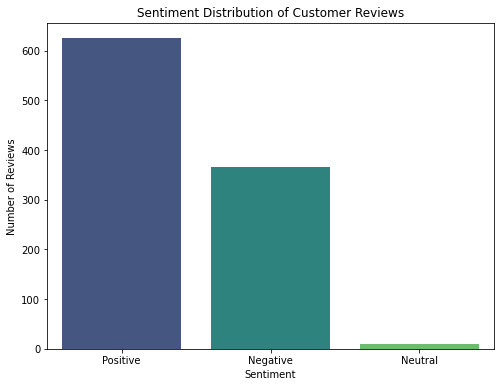

In [47]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get the sentiment of a review
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment function to the cleaned reviews
reviews_df['sentiment'] = reviews_df['cleaned_reviews'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_distribution = reviews_df['sentiment'].value_counts()
print(sentiment_distribution)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews_df['cleaned_reviews'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

# Get the feature names and display the topics
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

# Display the topics
topics


['flight ba service food class good business crew cabin seat',
 'flight ba hours london british airways service airport time luggage',
 'seats flight seat crew ba good time club experience plane',
 'flight ba customer refund service booked told british cancelled airways',
 'ba staff check service airline just time flight seat seats']

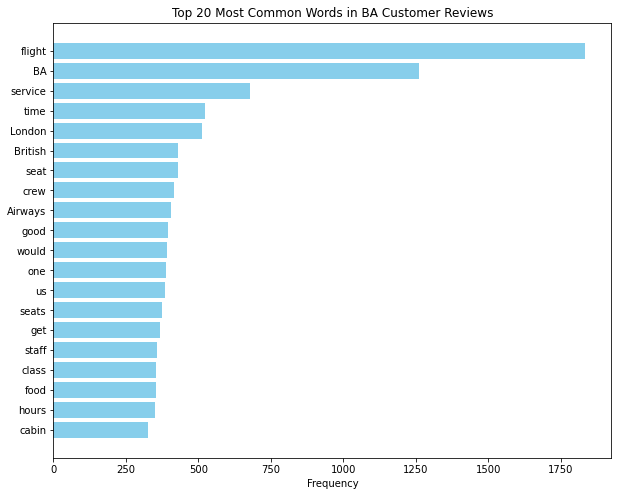

In [49]:

# 分词和去除停用词
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(all_reviews)
filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalpha()]

# 计算词频
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# 生成条形图
words, counts = zip(*common_words)
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in BA Customer Reviews')
plt.gca().invert_yaxis()  # 词频最高的在顶部
plt.show()
